In [1]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
#import matplotlib.pyplot as plt

%matplotlib widget
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
imgCv2 = cv2.imread("goldfish.jpg")
imgIN = cv2.imread("tree-1.jpg")
imgTemp = cv2.imread("night.jpeg")

img = cv2.cvtColor(imgCv2, cv2.COLOR_BGR2RGB)
imgIN = cv2.cvtColor(imgIN, cv2.COLOR_BGR2RGB)
imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)


In [3]:
colors = ('r','g','b')
  
# convert from RGB color-space to YCrCb
ycrcb_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

# equalize the histogram of the Y channel
ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

# convert back to RGB color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2RGB)

  

Text(0.5, 1.0, 'BGR')

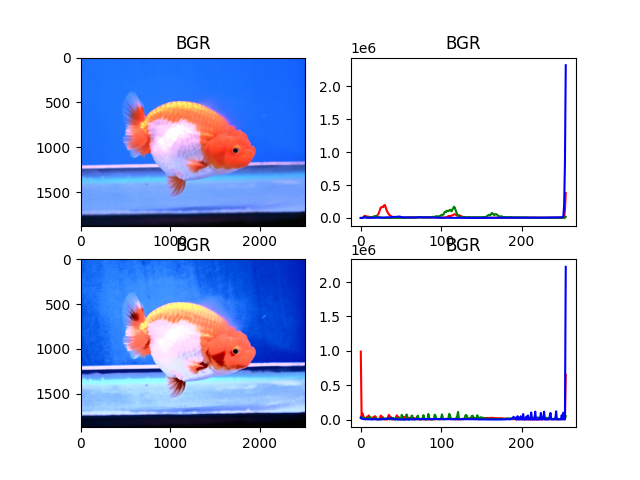

In [4]:
fig, axs = plt.subplots(2, 2) #row colum
axs[0, 0].imshow(img)
axs[0, 0].set_title("BGR")
# compute and plot the image histograms
for i,color in enumerate(colors):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    axs[0, 1].plot(hist,color = color)
axs[0, 1].set_title("BGR")
axs[1, 0].imshow(equalized_img)
axs[1, 0].set_title("BGR")
for i,color in enumerate(colors):
    eq_hist = cv2.calcHist([equalized_img],[i],None,[256],[0,256])
    axs[1, 1].plot(eq_hist,color = color)
axs[1, 1].set_title("BGR")



In [5]:
#Image Histogram Matching
def calculate_cdf(histogram):
    """
    This method calculates the cumulative distribution function
    :param array histogram: The values of the histogram
    :return: normalized_cdf: The normalized cumulative distribution function
    :rtype: array
    """
    # Get the cumulative sum of the elements
    cdf = histogram.cumsum()
 
    # Normalize the cdf
    normalized_cdf = cdf / float(cdf.max())
 
    return normalized_cdf

def calculate_lookup(src_cdf, ref_cdf):
    """
    This method creates the lookup table
    :param array src_cdf: The cdf for the source image
    :param array ref_cdf: The cdf for the reference image
    :return: lookup_table: The lookup table
    :rtype: array
    """
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table

def match_histograms(src_image, ref_image):
    """
    This method matches the source image histogram to the
    reference signal
    :param image src_image: The original source image
    :param image  ref_image: The reference image
    :return: image_after_matching
    :rtype: image (array)
    """
    # Split the images into the different color channels
    # b means blue, g means green and r means red
    src_b, src_g, src_r = cv2.split(src_image)
    ref_b, ref_g, ref_r = cv2.split(ref_image)
 
    # Compute the b, g, and r histograms separately
    # The flatten() Numpy method returns a copy of the array c
    # collapsed into one dimension.
    src_hist_blue, bin_0 = np.histogram(src_b.flatten(), 256, [0,256])
    src_hist_green, bin_1 = np.histogram(src_g.flatten(), 256, [0,256])
    src_hist_red, bin_2 = np.histogram(src_r.flatten(), 256, [0,256])    
    ref_hist_blue, bin_3 = np.histogram(ref_b.flatten(), 256, [0,256])    
    ref_hist_green, bin_4 = np.histogram(ref_g.flatten(), 256, [0,256])
    ref_hist_red, bin_5 = np.histogram(ref_r.flatten(), 256, [0,256])
 
    # Compute the normalized cdf for the source and reference image
    src_cdf_blue = calculate_cdf(src_hist_blue)
    src_cdf_green = calculate_cdf(src_hist_green)
    src_cdf_red = calculate_cdf(src_hist_red)
    ref_cdf_blue = calculate_cdf(ref_hist_blue)
    ref_cdf_green = calculate_cdf(ref_hist_green)
    ref_cdf_red = calculate_cdf(ref_hist_red)
 
    # Make a separate lookup table for each color
    blue_lookup_table = calculate_lookup(src_cdf_blue, ref_cdf_blue)
    green_lookup_table = calculate_lookup(src_cdf_green, ref_cdf_green)
    red_lookup_table = calculate_lookup(src_cdf_red, ref_cdf_red)
 
    # Use the lookup function to transform the colors of the original
    # source image
    blue_after_transform = cv2.LUT(src_b, blue_lookup_table)
    green_after_transform = cv2.LUT(src_g, green_lookup_table)
    red_after_transform = cv2.LUT(src_r, red_lookup_table)
 
    # Put the image back together
    image_after_matching = cv2.merge([
        blue_after_transform, green_after_transform, red_after_transform])
    image_after_matching = cv2.convertScaleAbs(image_after_matching)
 
    return image_after_matching

In [6]:
output_image = match_histograms(imgTemp, imgIN)

Text(0.5, 1.0, 'output')

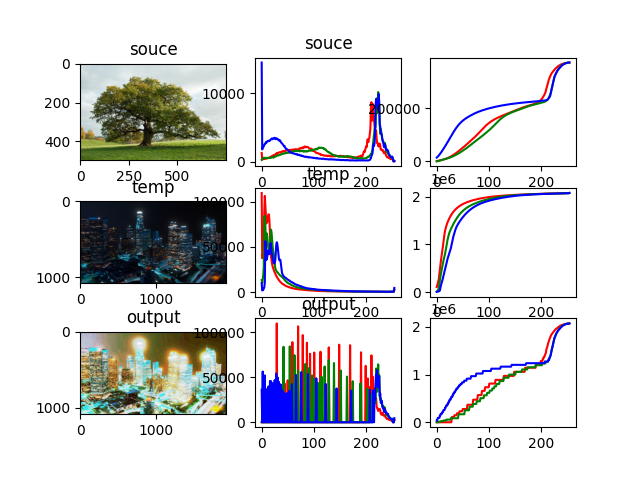

In [7]:
fig2, axs = plt.subplots(3, 3) #row colum
axs[0, 0].imshow(imgIN)
axs[0, 0].set_title("souce")
axs[1, 0].imshow(imgTemp)
axs[1, 0].set_title("temp")
axs[2, 0].imshow(output_image)
axs[2, 0].set_title("output")

for i,color in enumerate(colors):
    eq_imgIN = cv2.calcHist([imgIN],[i],None,[256],[0,256])
    axs[0, 1].plot(eq_imgIN,color = color)
    axs[0, 2].plot(eq_imgIN.cumsum(),color)
axs[0, 1].set_title("souce")
for i,color in enumerate(colors):
    eq_imgTemp = cv2.calcHist([imgTemp],[i],None,[256],[0,256])
    axs[1, 1].plot(eq_imgTemp,color = color)
    axs[1, 2].plot(eq_imgTemp.cumsum(),color)
axs[1, 1].set_title("temp")
for i,color in enumerate(colors):
    eq_output_image = cv2.calcHist([output_image],[i],None,[256],[0,256])
    axs[2, 1].plot(eq_output_image,color = color)
    axs[2, 2].plot(eq_output_image.cumsum(),color)
axs[2, 1].set_title("output")



